## bri1-related DEG plots

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(gprofiler2)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

Loading required package: grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex hea

In [2]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_4/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.1.0       gprofiler2_0.2.0      GeneOverlap_1.24.0   
 [4] circlize_0.4.14       ComplexHeatmap_2.11.1 cowplot_1.1.0        
 [7] SeuratObject_4.0.2    Seurat_4.0.5          forcats_0.5.0        
[10] stringr_1.4.0         dplyr_1.0.7           purrr_0.3.4          
[13]

In [3]:
sig_DE_fil <- read_csv("./output/v4_bri1_T_v_WT_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

nb_genes_per_clust <- sig_DE_fil  %>%
  group_by(cluster_id) %>%
  tally()

# color up and down

nb_up_dn <- sig_DE_fil  %>%
  group_by(cluster_id, up_dn_label) %>%
  tally(name = "n_up_dn") %>%
left_join(nb_genes_per_clust)

nb_up_dn

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.


Joining, by = "cluster_id"



cluster_id,up_dn_label,n_up_dn,n
<chr>,<chr>,<int>,<int>
Distal Columella,Down,520,1036
Distal Columella,Up,516,1036
Distal Lateral Root Cap,Down,711,1271
Distal Lateral Root Cap,Up,560,1271
Elongation_Atrichoblast,Down,1509,2491
Elongation_Atrichoblast,Up,982,2491
Elongation_Cortex,Down,1634,2765
Elongation_Cortex,Up,1131,2765
Elongation_Endodermis,Down,1550,3141


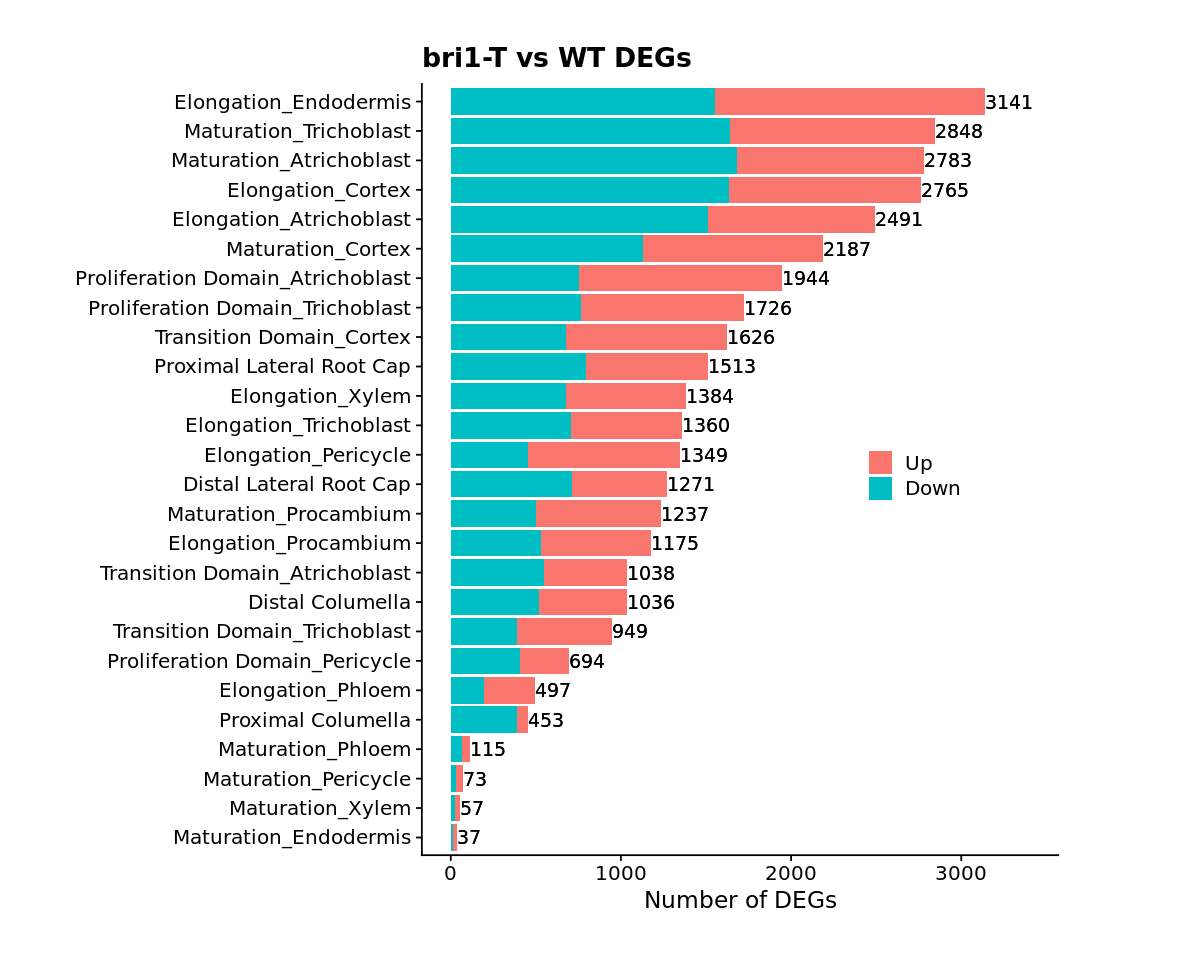

In [4]:
options(repr.plot.width=10, repr.plot.height=8)

nb_v <- ggplot(data=nb_up_dn, aes(x=reorder(cluster_id, n), y=n_up_dn, fill=factor(up_dn_label, levels=c("Up", "Down")))) +
  geom_bar(stat="identity", position="stack") + ylab("Number of DEGs") + xlab("") + 
scale_y_continuous(limits = c(0, 3400)) +
geom_text(aes(label=n, y = n), hjust=0, vjust=0.5, size=4)  + 
theme_cowplot()  +theme(plot.margin = margin(1,3,1,1, "cm"), 
                        legend.title=element_blank(), 
                       legend.position = c(0.7, 0.5)) + ggtitle("bri1-T vs WT DEGs")

(bri1_v_WT <- nb_v + coord_flip())

In [5]:
# GO enrichment of DEGs

markers_sel <- select(sig_DE_fil, gene, clust_up_dn)

markers_list <- split(markers_sel, f=markers_sel$clust_up_dn)
 
#this makes list from long df of gene lists - TARGET is what we want to keep
markers_list  <- lapply(markers_list, function(x) x[names(x)=="gene"])
# convert each sublist into character and eliminate duplicates
markers_list  <- lapply(markers_list, function(x) as.character(unique(x$gene)))

cluster_GO <- gost(markers_list, organism = "athaliana", correction_method = "fdr", significant = F, multi_query = F)

In [6]:
cluster_GO_df <- cluster_GO[[1]]

cluster_GO_sig <- filter(cluster_GO_df, p_value<=0.01)

# top  terms for each cluster

cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=8) %>%
  group_by(query) %>%
  top_n(1, wt = -p_value) %>%
  arrange(desc(p_value)) -> top_GO

GO_n <- cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=8) %>%
  group_by(term_id) %>%
  tally() %>%
  arrange(desc(n))


GO_n <- dplyr::rename(GO_n, "n_clusters"=n)

cluster_GO_sig_n <- left_join(cluster_GO_sig, GO_n)

# get all terms for the top ones so that all clusters have values

top_GO_all <- filter(cluster_GO_df, term_id %in% top_GO$term_id)


#spread and plot


top_GO_sel <- select(top_GO_all, query, p_value, term_id, term_name)

spread_GO <- spread(top_GO_sel, key = query, p_value)

spread_GO[is.na(spread_GO)] <- 1

spread_GO_m <- as.matrix(-log10(spread_GO[3:ncol(spread_GO)]))
rownames(spread_GO_m) <- spread_GO$term_name


spread_GO_m_t <- t(spread_GO_m)

GO_hm_t <- Heatmap(spread_GO_m_t, 
                 name = "-log10_pval", 
                 heatmap_legend_param = list(title_position="leftcenter-rot", color_bar = "continuous"), 
                 col = colorRamp2(c(0, 20), c("beige", "darkgreen")), 
                 cluster_rows = T, 
                 cluster_columns = T, 
                 use_raster= FALSE, 
                 show_column_names = TRUE, 
                 show_row_names = TRUE, 
                 show_row_dend = TRUE, 
                 show_column_dend = TRUE,
                 column_names_rot = 45,
                 clustering_distance_columns = "pearson", 
                 clustering_distance_rows = "pearson",
                 row_names_gp = gpar(fontsize = 14), 
                column_names_gp = gpar(fontsize = 14)) 

Joining, by = "term_id"



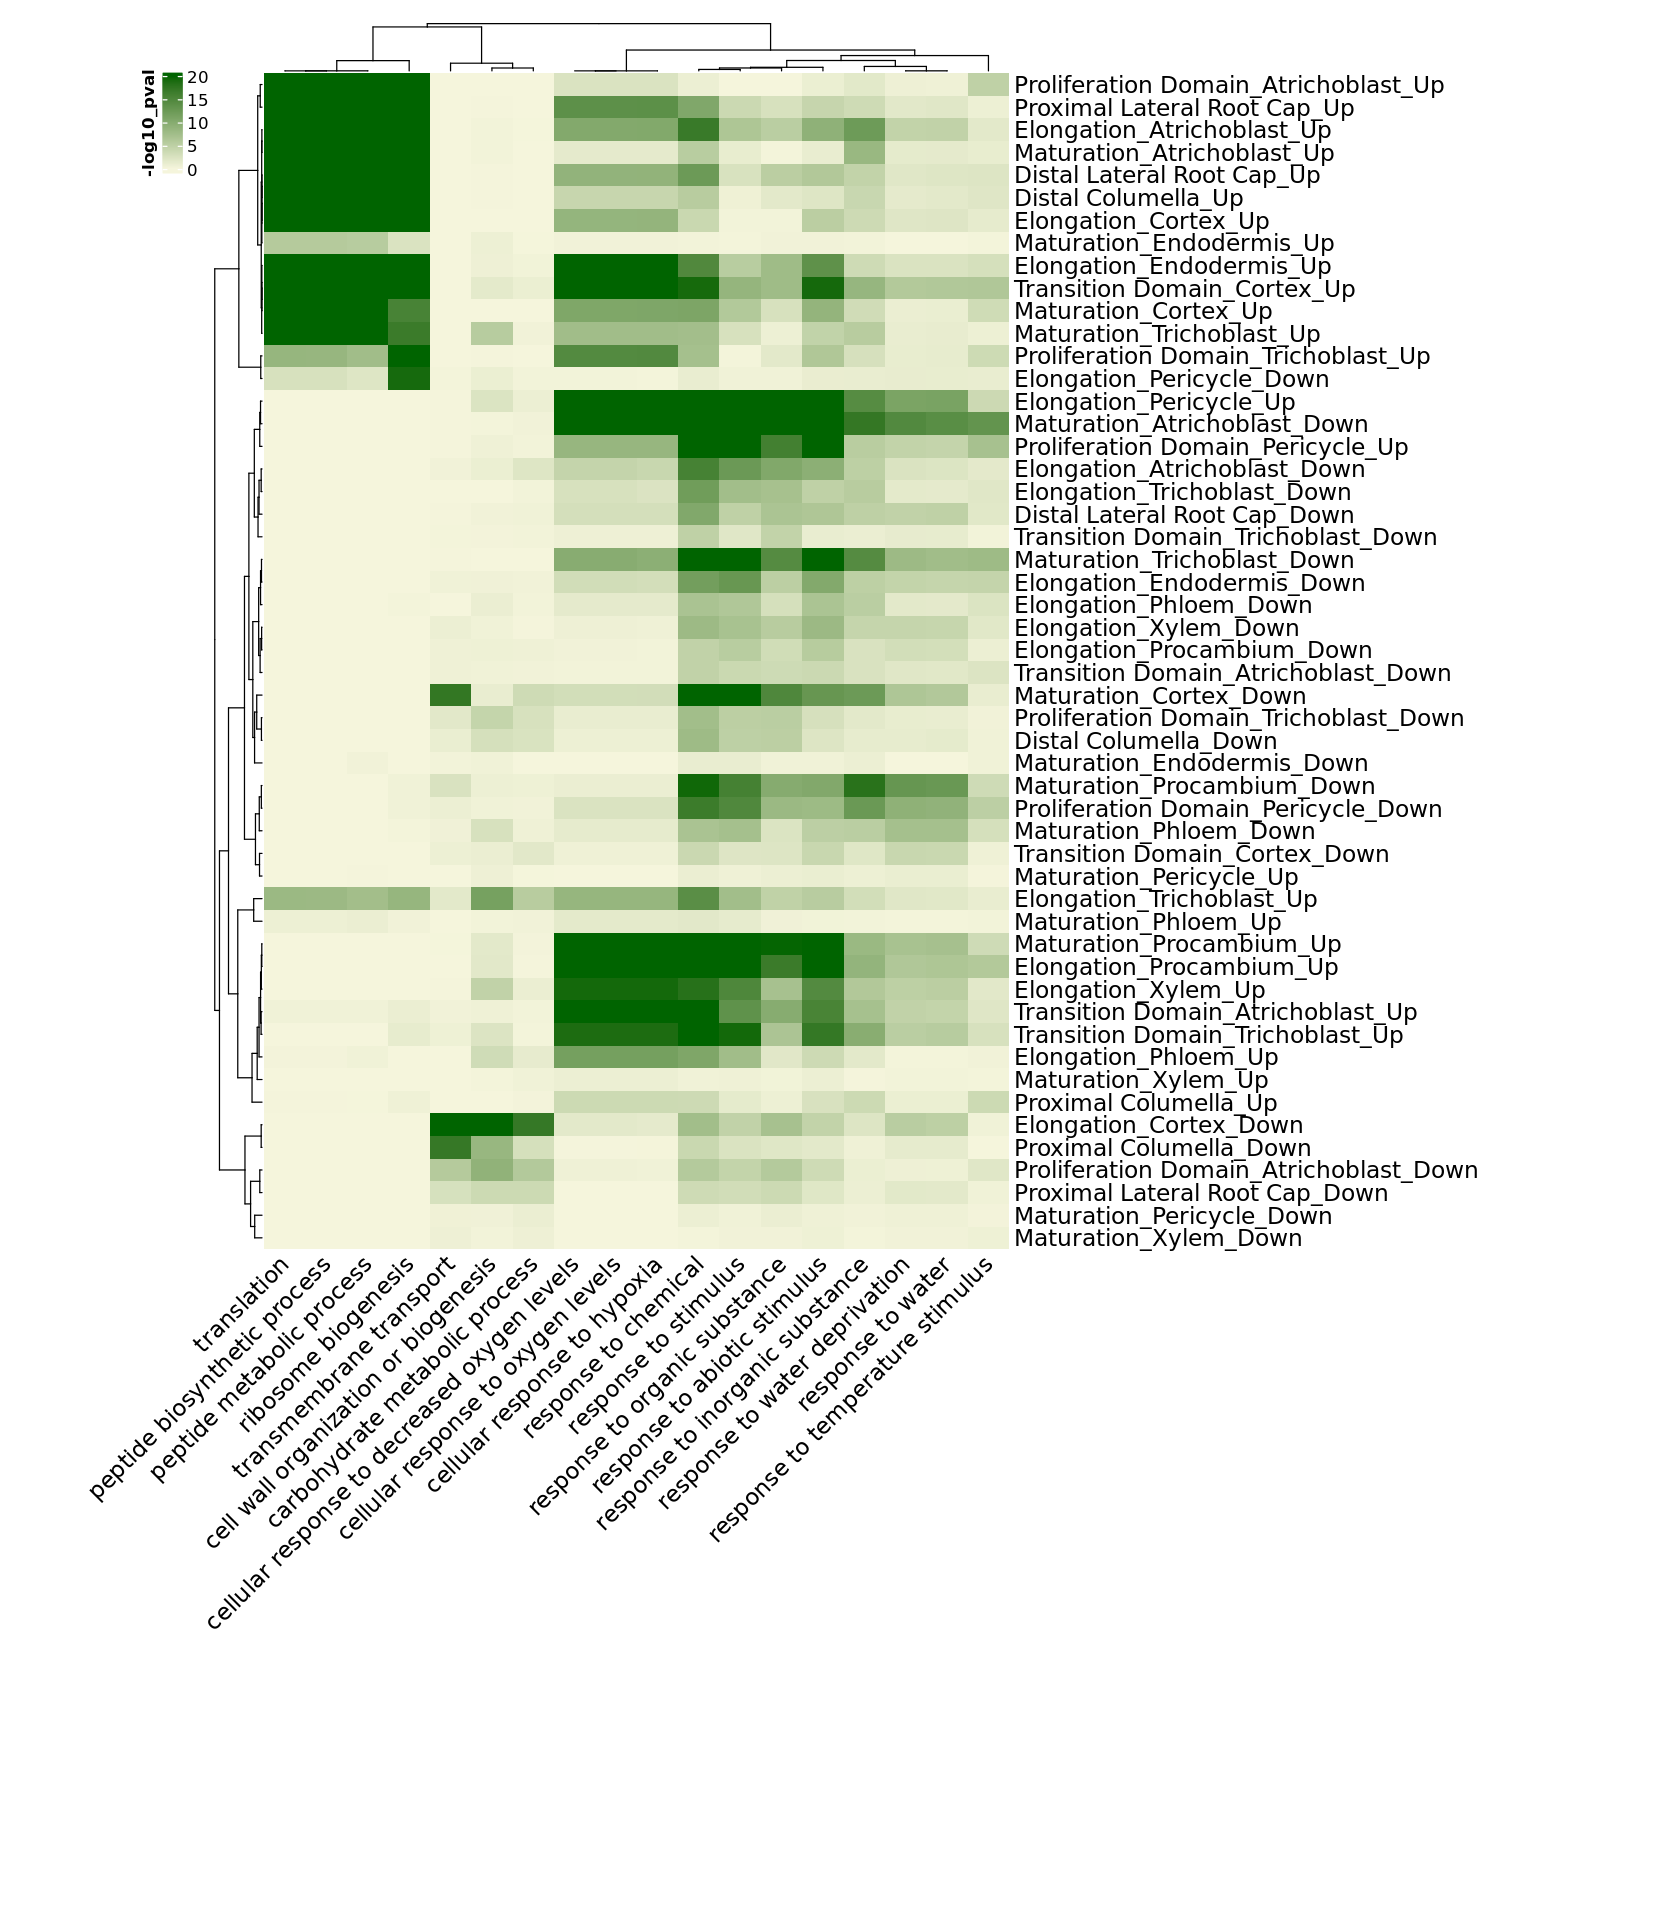

In [7]:
options(repr.plot.width = 14, repr.plot.height = 16)

# padding - bottom, left, top, right
draw(GO_hm_t, padding = unit(c(80, 30, 5, 80), "mm"), heatmap_legend_side = "left")

In [8]:
pdf("./output/bri1-T_GO_hm.pdf", width = 14, height = 16)


# padding - bottom, left, top, right
draw(GO_hm_t, padding = unit(c(80, 30, 5, 80), "mm"), heatmap_legend_side = "left")

dev.off()

png 
  2

In [9]:
sig_DE_fil <- read_csv("./output/v4_pGL2-BRI1-bri1_T_v_WT_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

nb_genes_per_clust <- sig_DE_fil  %>%
  group_by(cluster_id) %>%
  tally()

# color up and down

nb_up_dn <- sig_DE_fil  %>%
  group_by(cluster_id, up_dn_label) %>%
  tally(name = "n_up_dn") %>%
left_join(nb_genes_per_clust)

nb_up_dn

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.


Joining, by = "cluster_id"



cluster_id,up_dn_label,n_up_dn,n
<chr>,<chr>,<int>,<int>
Distal Columella,Down,197,320
Distal Columella,Up,123,320
Distal Lateral Root Cap,Down,386,588
Distal Lateral Root Cap,Up,202,588
Elongation_Atrichoblast,Down,1193,1964
Elongation_Atrichoblast,Up,771,1964
Elongation_Cortex,Down,713,1252
Elongation_Cortex,Up,539,1252
Elongation_Endodermis,Down,1346,2265


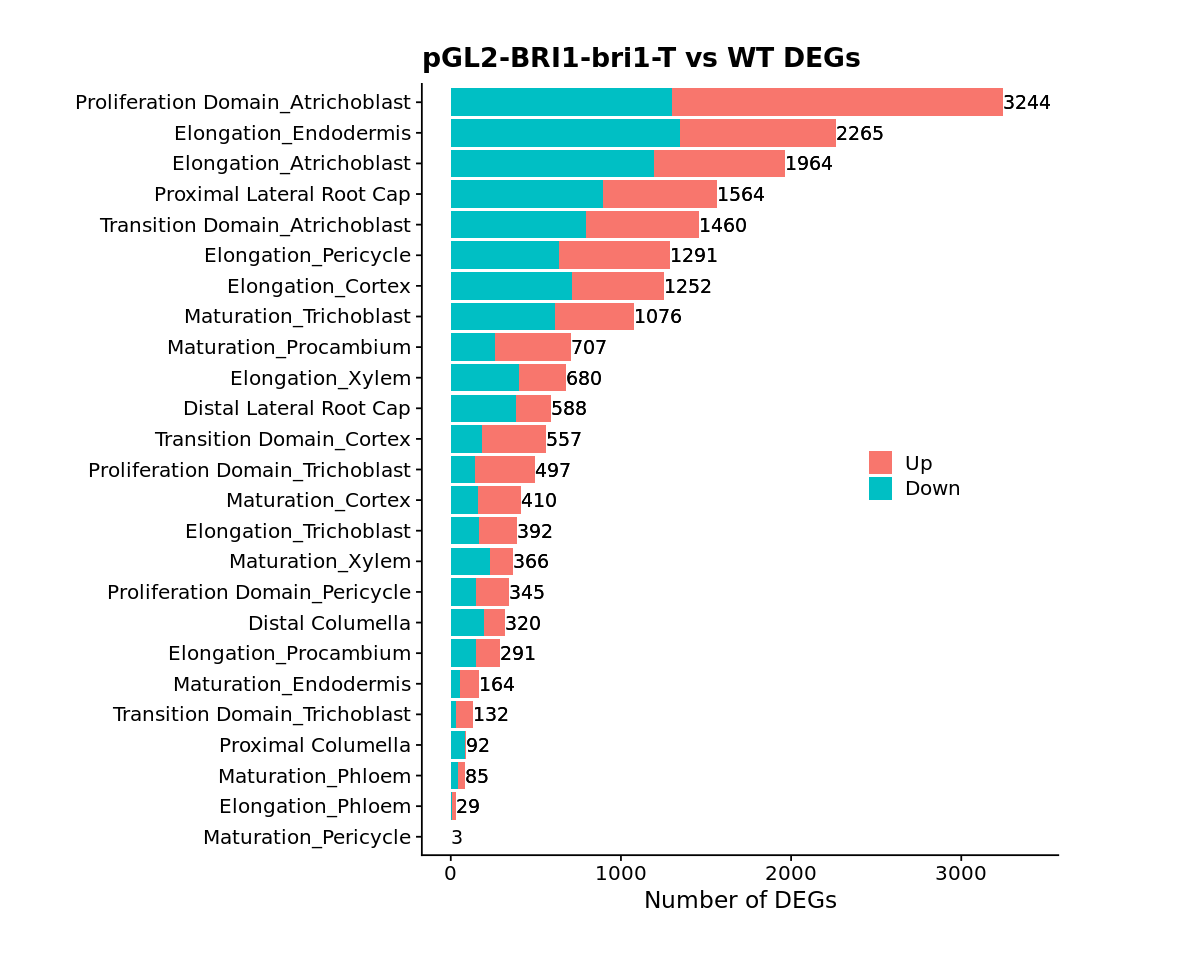

In [10]:
options(repr.plot.width=10, repr.plot.height=8)

nb_v <- ggplot(data=nb_up_dn, aes(x=reorder(cluster_id, n), y=n_up_dn, fill=factor(up_dn_label, levels=c("Up", "Down")))) +
  geom_bar(stat="identity", position="stack") + ylab("Number of DEGs") + xlab("") + 
scale_y_continuous(limits = c(0, 3400)) +
geom_text(aes(label=n, y = n), hjust=0, vjust=0.5, size=4)  + 
theme_cowplot()  +theme(plot.margin = margin(1,3,1,1, "cm"), 
                        legend.title=element_blank(), 
                       legend.position = c(0.7, 0.5)) + ggtitle("pGL2-BRI1-bri1-T vs WT DEGs")

(pGL2_BRI1_bri1_T_v_WT <- nb_v + coord_flip())

In [11]:
# GO enrichment of DEGs

markers_sel <- select(sig_DE_fil, gene, clust_up_dn)

markers_list <- split(markers_sel, f=markers_sel$clust_up_dn)
 
#this makes list from long df of gene lists - TARGET is what we want to keep
markers_list  <- lapply(markers_list, function(x) x[names(x)=="gene"])
# convert each sublist into character and eliminate duplicates
markers_list  <- lapply(markers_list, function(x) as.character(unique(x$gene)))

cluster_GO <- gost(markers_list, organism = "athaliana", correction_method = "fdr", significant = F, multi_query = F)

In [12]:
cluster_GO_df <- cluster_GO[[1]]

cluster_GO_sig <- filter(cluster_GO_df, p_value<=0.01)

# top  terms for each cluster

cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=8) %>%
  group_by(query) %>%
  top_n(1, wt = -p_value) %>%
  arrange(desc(p_value)) -> top_GO

GO_n <- cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=8) %>%
  group_by(term_id) %>%
  tally() %>%
  arrange(desc(n))


GO_n <- dplyr::rename(GO_n, "n_clusters"=n)

cluster_GO_sig_n <- left_join(cluster_GO_sig, GO_n)

# get all terms for the top ones so that all clusters have values

top_GO_all <- filter(cluster_GO_df, term_id %in% top_GO$term_id)


#spread and plot


top_GO_sel <- select(top_GO_all, query, p_value, term_id, term_name)

spread_GO <- spread(top_GO_sel, key = query, p_value)

spread_GO[is.na(spread_GO)] <- 1

spread_GO_m <- as.matrix(-log10(spread_GO[3:ncol(spread_GO)]))
rownames(spread_GO_m) <- spread_GO$term_name


spread_GO_m_t <- t(spread_GO_m)

GO_hm_t <- Heatmap(spread_GO_m_t, 
                 name = "-log10_pval", 
                 heatmap_legend_param = list(title_position="leftcenter-rot", color_bar = "continuous"), 
                 col = colorRamp2(c(0, 20), c("beige", "darkgreen")), 
                 cluster_rows = T, 
                 cluster_columns = T, 
                 use_raster= FALSE, 
                 show_column_names = TRUE, 
                 show_row_names = TRUE, 
                 show_row_dend = TRUE, 
                 show_column_dend = TRUE,
                 column_names_rot = 45,
                 clustering_distance_columns = "pearson", 
                 clustering_distance_rows = "pearson",
                 row_names_gp = gpar(fontsize = 14), 
                column_names_gp = gpar(fontsize = 14)) 

Joining, by = "term_id"



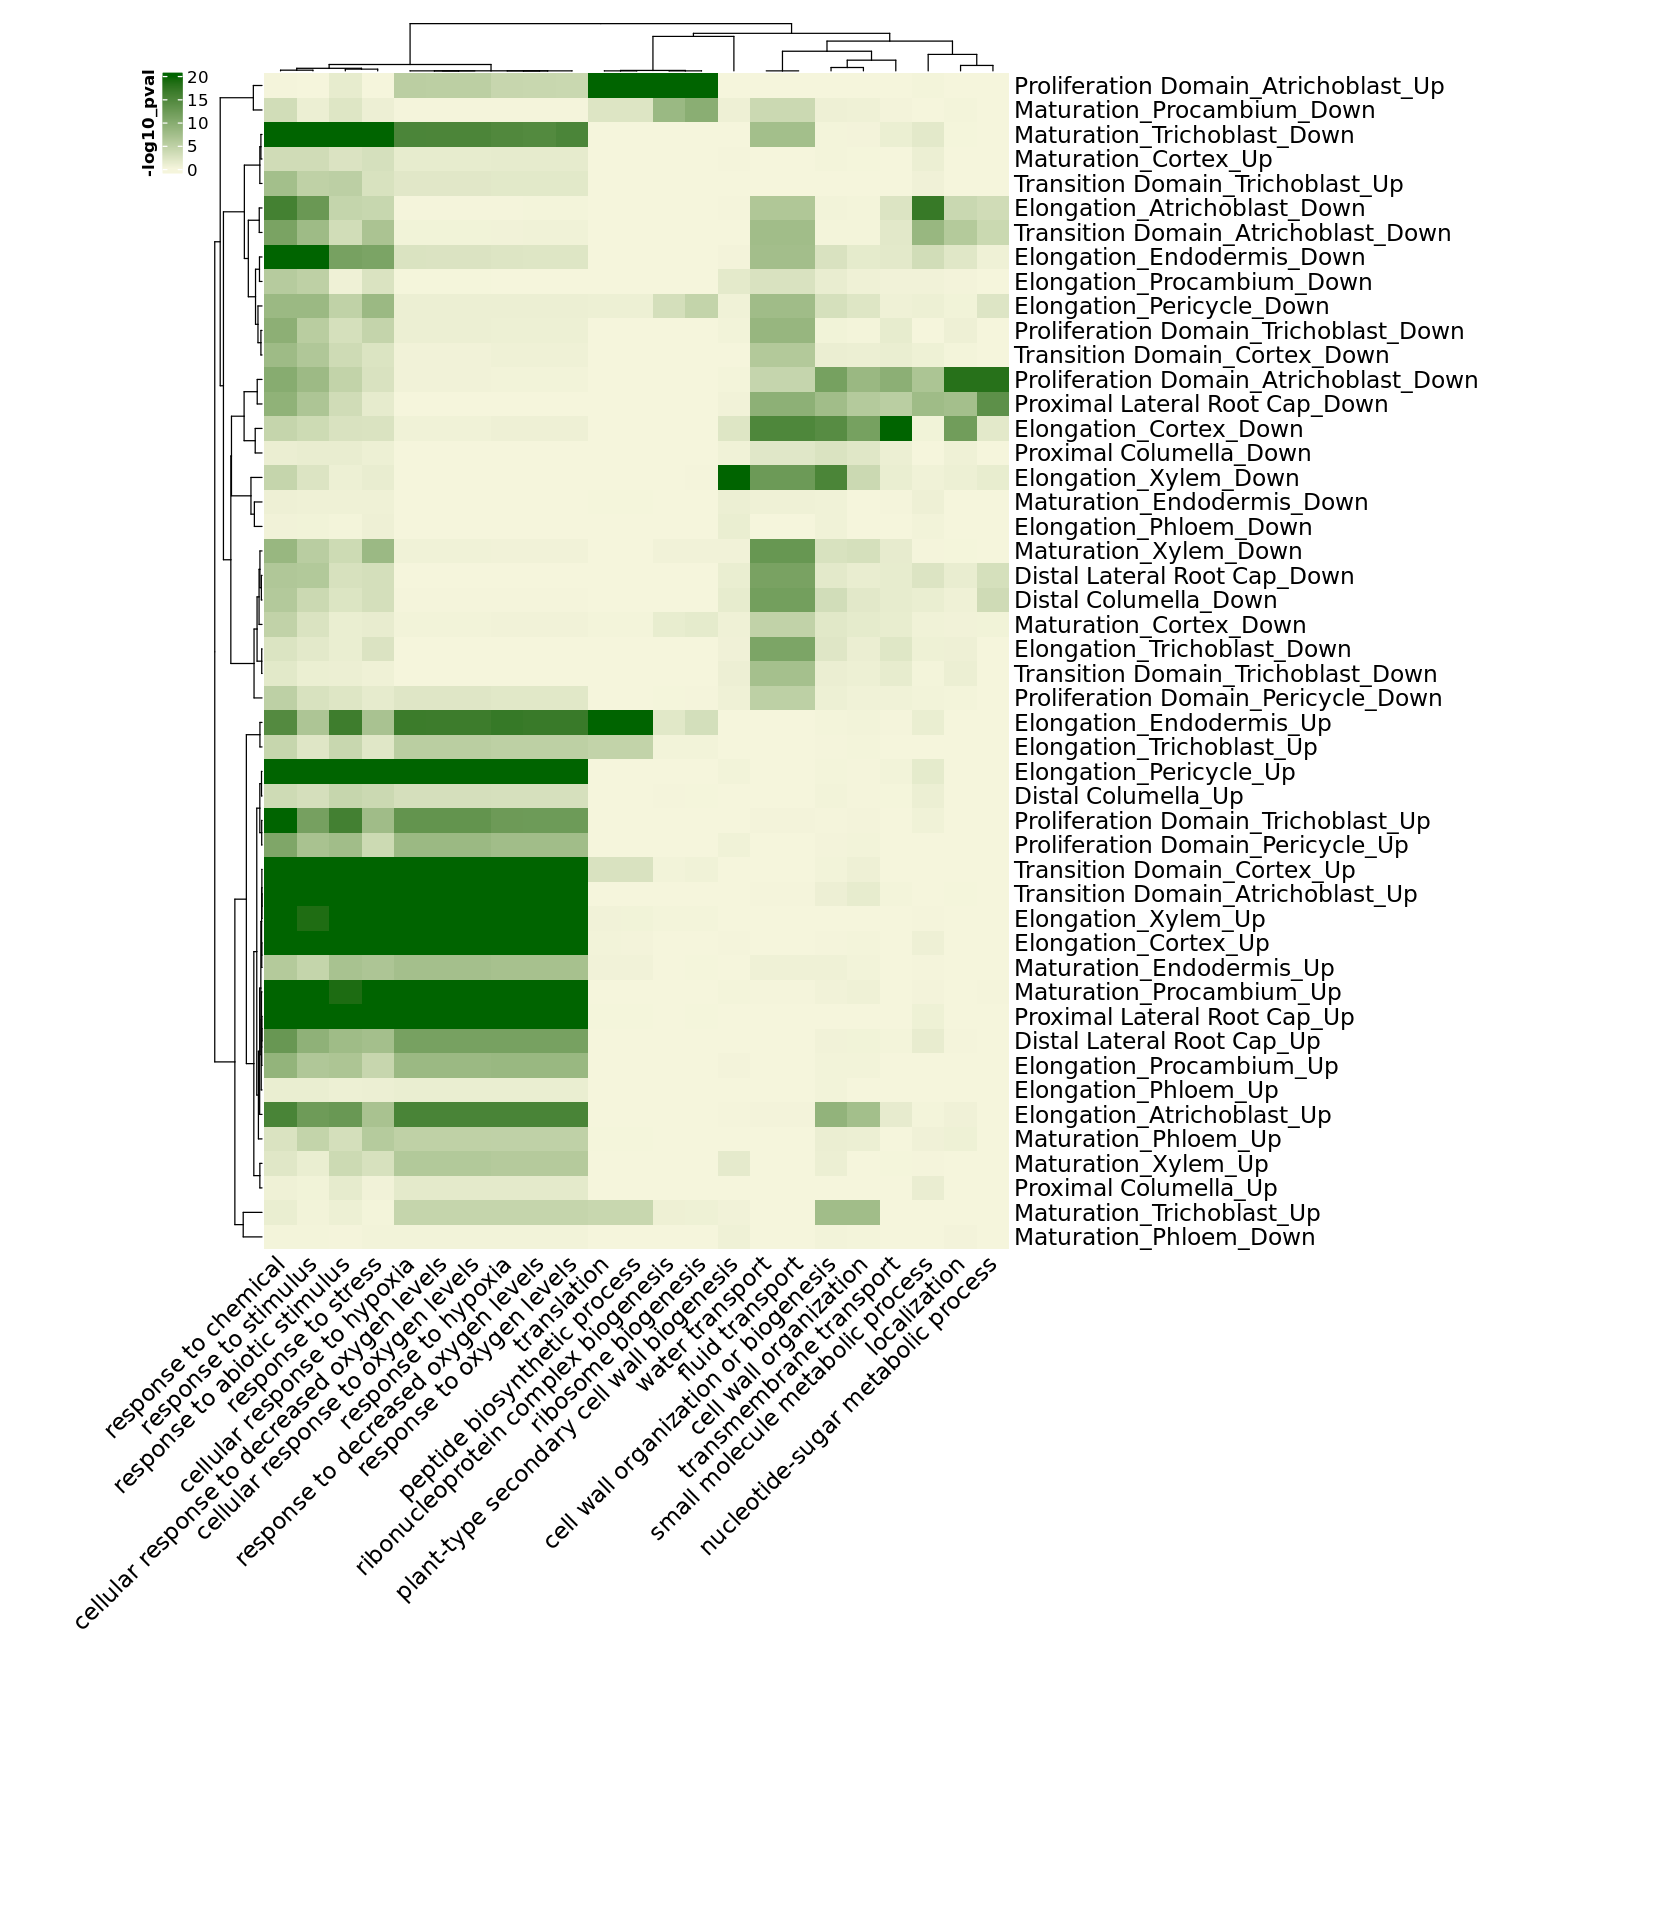

In [13]:
options(repr.plot.width = 14, repr.plot.height = 16)

# padding - bottom, left, top, right
draw(GO_hm_t, padding = unit(c(80, 30, 5, 80), "mm"), heatmap_legend_side = "left")

In [14]:
pdf("./output/pGL2_BRI1_bri1_T_v_WT_GO_hm.pdf", width = 14, height = 16)


# padding - bottom, left, top, right
draw(GO_hm_t, padding = unit(c(80, 30, 5, 80), "mm"), heatmap_legend_side = "left")

dev.off()

png 
  2

In [15]:
sig_DE_fil <- read_csv("./output/v4_pGL2-BRI1-bri1_T_v_bri1-T_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

nb_genes_per_clust <- sig_DE_fil  %>%
  group_by(cluster_id) %>%
  tally()

# color up and down

nb_up_dn <- sig_DE_fil  %>%
  group_by(cluster_id, up_dn_label) %>%
  tally(name = "n_up_dn") %>%
left_join(nb_genes_per_clust)

nb_up_dn

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.


Joining, by = "cluster_id"



cluster_id,up_dn_label,n_up_dn,n
<chr>,<chr>,<int>,<int>
Distal Columella,Down,210,477
Distal Columella,Up,267,477
Distal Lateral Root Cap,Down,305,692
Distal Lateral Root Cap,Up,387,692
Elongation_Atrichoblast,Down,947,2044
Elongation_Atrichoblast,Up,1097,2044
Elongation_Cortex,Down,655,1271
Elongation_Cortex,Up,616,1271
Elongation_Endodermis,Down,1044,2077


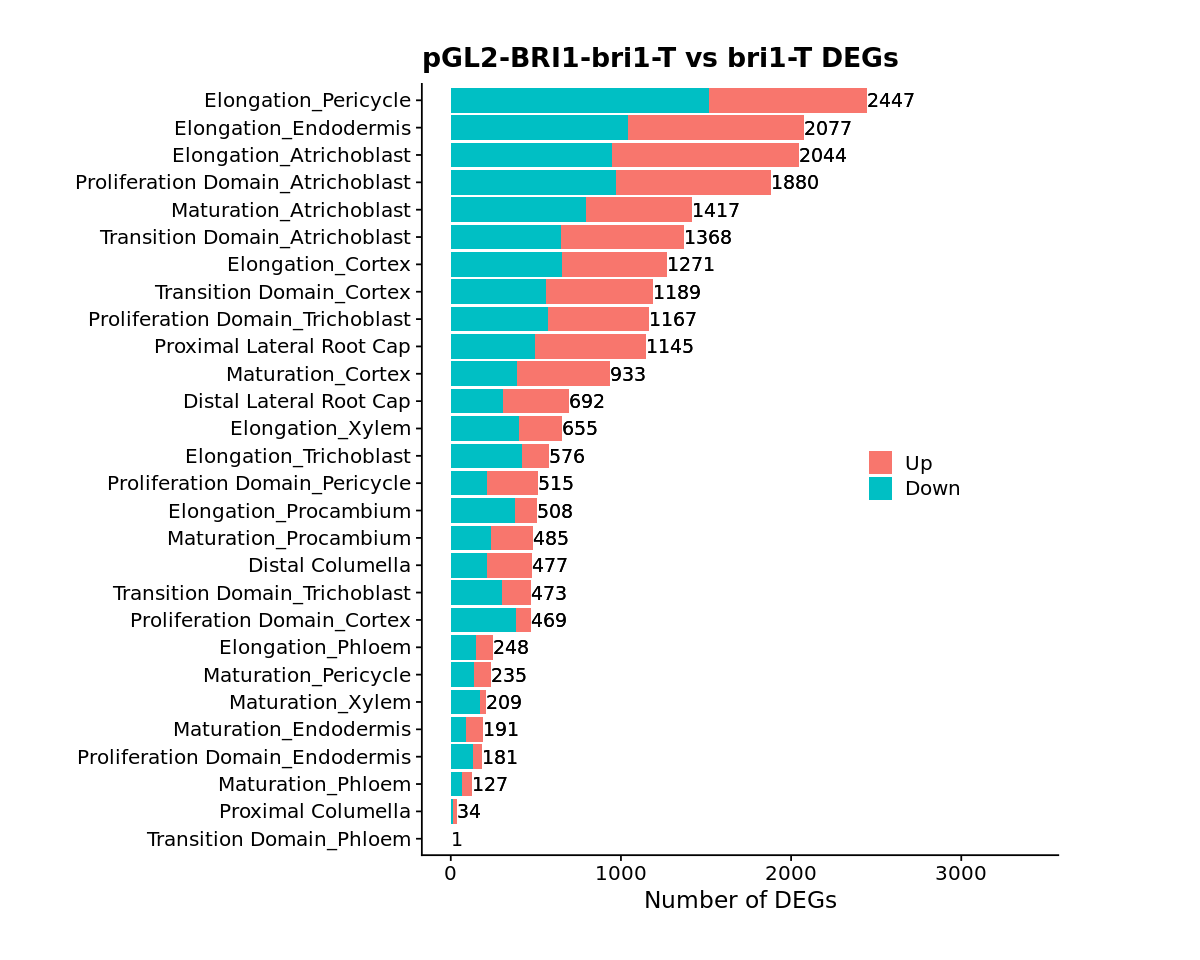

In [16]:
options(repr.plot.width=10, repr.plot.height=8)

nb_v <- ggplot(data=nb_up_dn, aes(x=reorder(cluster_id, n), y=n_up_dn, fill=factor(up_dn_label, levels=c("Up", "Down")))) +
  geom_bar(stat="identity", position="stack") + ylab("Number of DEGs") + xlab("") + 
scale_y_continuous(limits = c(0, 3400)) +
geom_text(aes(label=n, y = n), hjust=0, vjust=0.5, size=4)  + 
theme_cowplot()  +theme(plot.margin = margin(1,3,1,1, "cm"), 
                        legend.title=element_blank(), 
                       legend.position = c(0.7, 0.5)) + ggtitle("pGL2-BRI1-bri1-T vs bri1-T DEGs")

(pGL2_BRI1_bri1_T_v_bri1_T <- nb_v + coord_flip())

#ggsave("./output/BL2hr_v_BRZ_vertical_num_DE_genes.png", width = 10, height = 8)

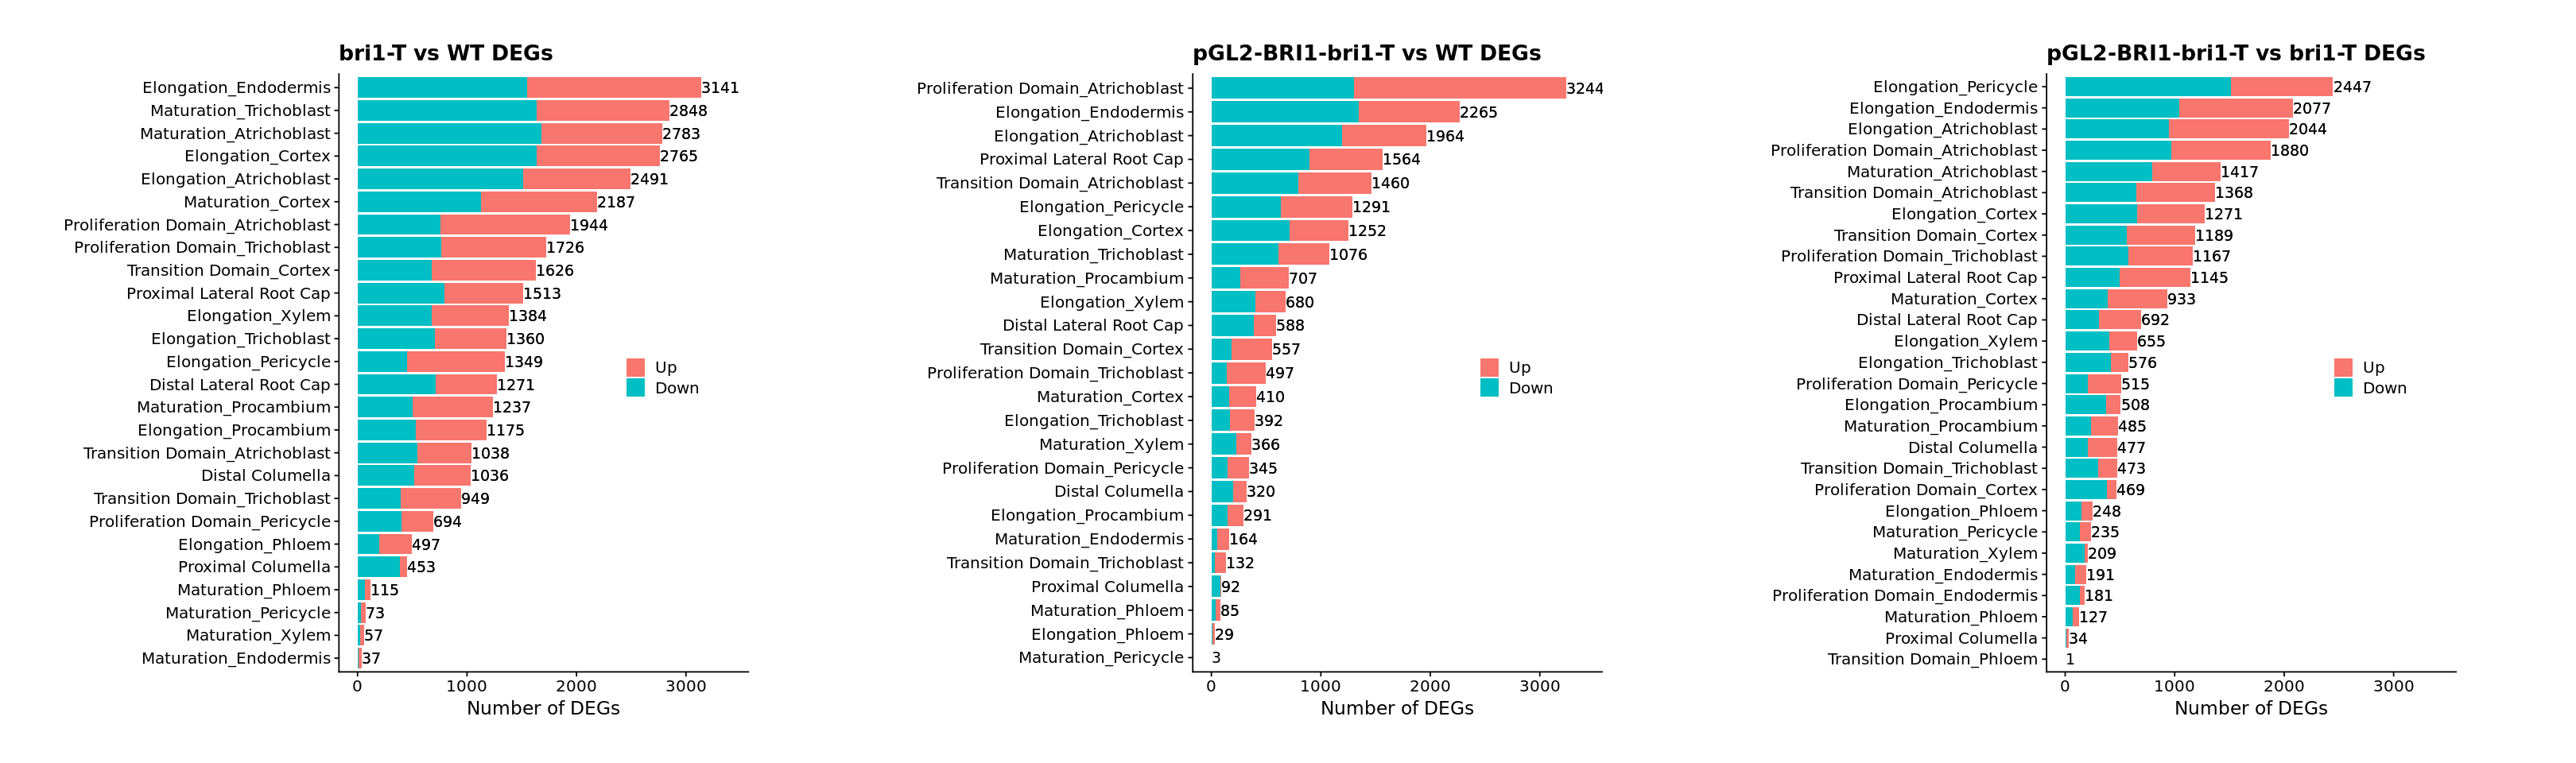

In [17]:
options(repr.plot.width=27, repr.plot.height=8)

bri1_v_WT + pGL2_BRI1_bri1_T_v_WT + pGL2_BRI1_bri1_T_v_bri1_T

ggsave("./output/bri1-pGL2-n_DEGs_barplot.pdf", width = 30, height = 8)

In [18]:
# GO enrichment of DEGs

markers_sel <- select(sig_DE_fil, gene, clust_up_dn)

markers_list <- split(markers_sel, f=markers_sel$clust_up_dn)
 
#this makes list from long df of gene lists - TARGET is what we want to keep
markers_list  <- lapply(markers_list, function(x) x[names(x)=="gene"])
# convert each sublist into character and eliminate duplicates
markers_list  <- lapply(markers_list, function(x) as.character(unique(x$gene)))

cluster_GO <- gost(markers_list, organism = "athaliana", correction_method = "fdr", significant = F, multi_query = F)

In [19]:
cluster_GO_df <- cluster_GO[[1]]

cluster_GO_sig <- filter(cluster_GO_df, p_value<=0.01)

# top  terms for each cluster

cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=8) %>%
  group_by(query) %>%
  top_n(1, wt = -p_value) %>%
  arrange(desc(p_value)) -> top_GO

GO_n <- cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=8) %>%
  group_by(term_id) %>%
  tally() %>%
  arrange(desc(n))


GO_n <- dplyr::rename(GO_n, "n_clusters"=n)

cluster_GO_sig_n <- left_join(cluster_GO_sig, GO_n)

# get all terms for the top ones so that all clusters have values

top_GO_all <- filter(cluster_GO_df, term_id %in% top_GO$term_id)


#spread and plot


top_GO_sel <- select(top_GO_all, query, p_value, term_id, term_name)

spread_GO <- spread(top_GO_sel, key = query, p_value)

spread_GO[is.na(spread_GO)] <- 1

spread_GO_m <- as.matrix(-log10(spread_GO[3:ncol(spread_GO)]))
rownames(spread_GO_m) <- spread_GO$term_name


spread_GO_m_t <- t(spread_GO_m)

GO_hm_t <- Heatmap(spread_GO_m_t, 
                 name = "-log10_pval", 
                 heatmap_legend_param = list(title_position="leftcenter-rot", color_bar = "continuous"), 
                 col = colorRamp2(c(0, 20), c("beige", "darkgreen")), 
                 cluster_rows = T, 
                 cluster_columns = T, 
                 use_raster= FALSE, 
                 show_column_names = TRUE, 
                 show_row_names = TRUE, 
                 show_row_dend = TRUE, 
                 show_column_dend = TRUE,
                 column_names_rot = 45,
                 clustering_distance_columns = "pearson", 
                 clustering_distance_rows = "pearson",
                 row_names_gp = gpar(fontsize = 14), 
                column_names_gp = gpar(fontsize = 14)) 

Joining, by = "term_id"



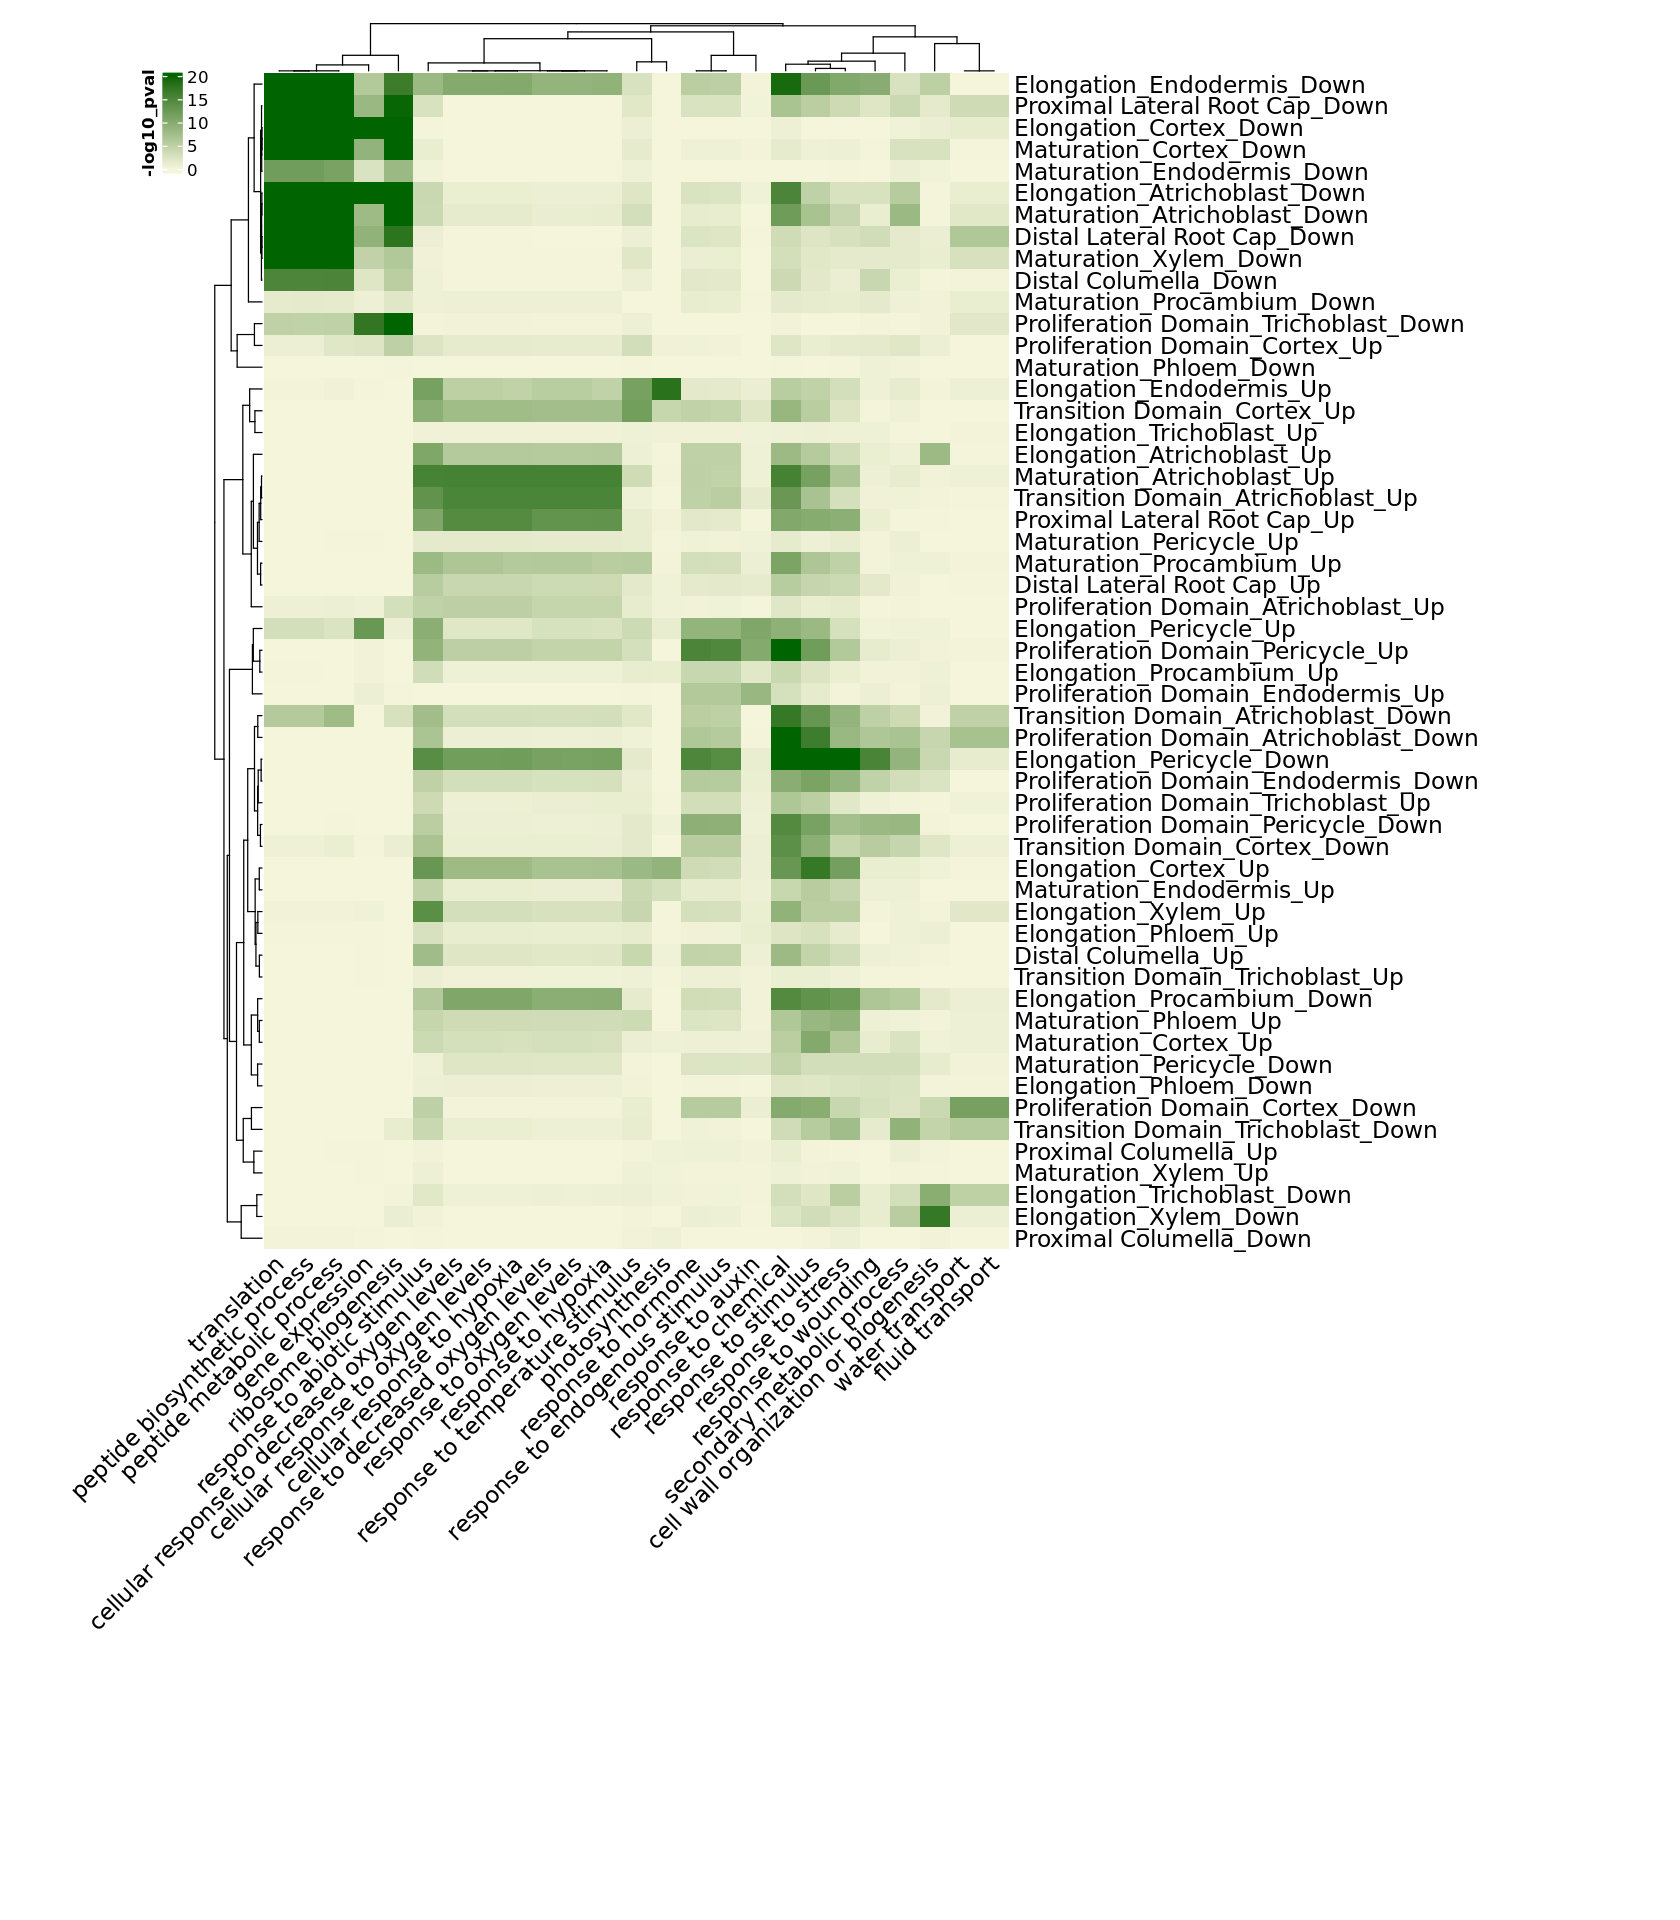

In [20]:
options(repr.plot.width = 14, repr.plot.height = 16)

# padding - bottom, left, top, right
draw(GO_hm_t, padding = unit(c(80, 30, 5, 80), "mm"), heatmap_legend_side = "left")

In [21]:
pdf("./output/pGL2-BRI1-bri1-T_vs_bri1-T_GO_hm.pdf", width = 14, height = 16)


# padding - bottom, left, top, right
draw(GO_hm_t, padding = unit(c(80, 30, 5, 80), "mm"), heatmap_legend_side = "left")

dev.off()

png 
  2